<a href="https://colab.research.google.com/github/EcoGreenPath-C23-PM02/MachineLearning/blob/main/TrialLinearReg%26Classification_Ester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression: Predicting Carbon Footprint

**Step 1: Import the necessary libraries and load the dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Load the dataset
dataset = pd.read_csv("dataset_carbon_2.csv", sep=';')
dataset.head()

,quest_carbon,energy_consumption,carbon_footprint,number_of_participants,activity_duration,environmental_impact
0,tree planting,18,7,3,80,High
1,volunteering (tutor),10,6,2,90,Medium
2,bring your trash back,7,3,2,50,Medium
3,cleaning around village,15,8,3,60,High
4,power-saving practices,5,2,2,10,Low


**Step 2: Preprocessing and visualizing the dataset**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   quest_carbon            6 non-null      object
 1   energy_consumption      6 non-null      int64 
 2   carbon_footprint        6 non-null      int64 
 3   number_of_participants  6 non-null      int64 
 4   activity_duration       6 non-null      int64 
 5   environmental_impact    6 non-null      object
dtypes: int64(4), object(2)
memory usage: 416.0+ bytes


In [ ]:
print(dataset.columns)

Index(['quest_carbon', 'energy_consumption', 'carbon_footprint',
       'number_of_participants', 'activity_duration', 'environmental_impact'],
      dtype='object')


In [ ]:
print(dataset.index)

RangeIndex(start=0, stop=6, step=1)


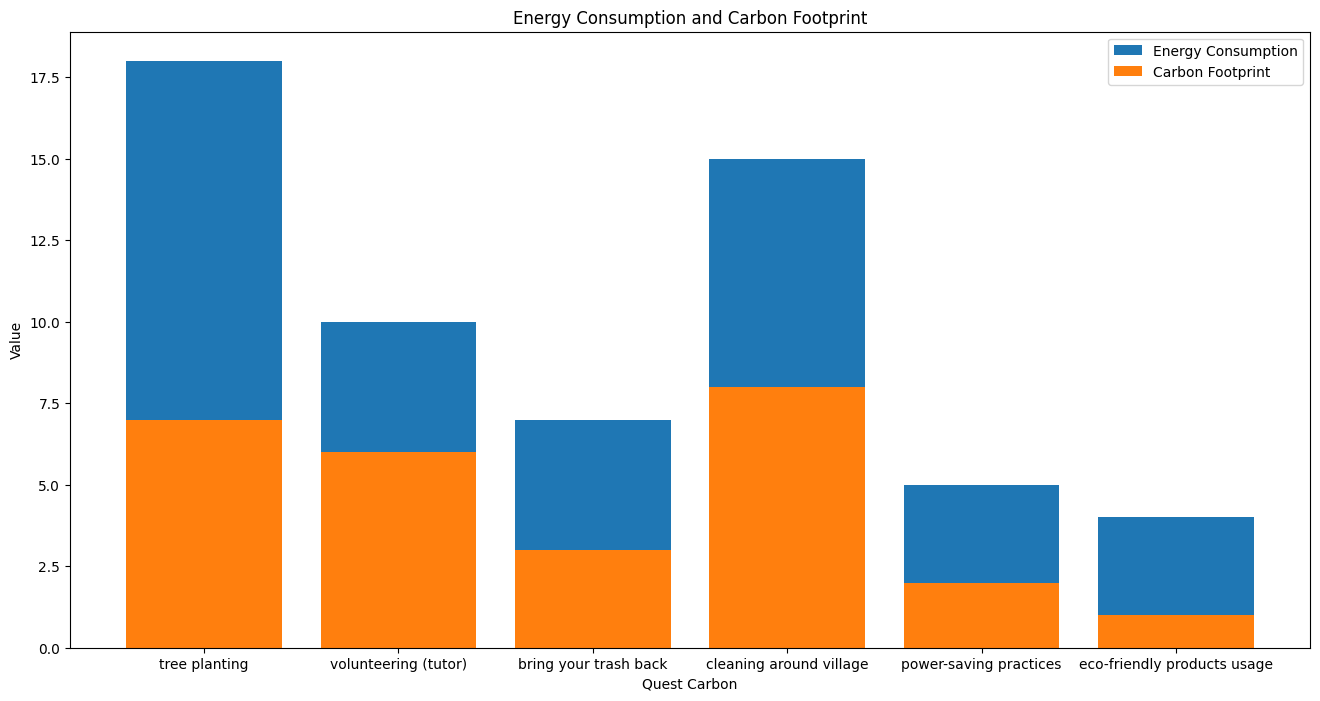

In [ ]:
# Visualizing with Bar Plot
quest_carbon = dataset['quest_carbon']
energy_consumption = dataset['energy_consumption']
carbon_footprint = dataset['carbon_footprint']

# Create figure and axes with specific figsize
fig, ax = plt.subplots(figsize=(16, 8))

# Plot energy consumption
ax.bar(quest_carbon, energy_consumption, label='Energy Consumption')
# Plot carbon footprint
ax.bar(quest_carbon, carbon_footprint, label='Carbon Footprint')

# Set labels and title
ax.set_xlabel('Quest Carbon')
ax.set_ylabel('Value')
ax.set_title('Energy Consumption and Carbon Footprint')

# Add legend
ax.legend()

# Show the plot
plt.show()

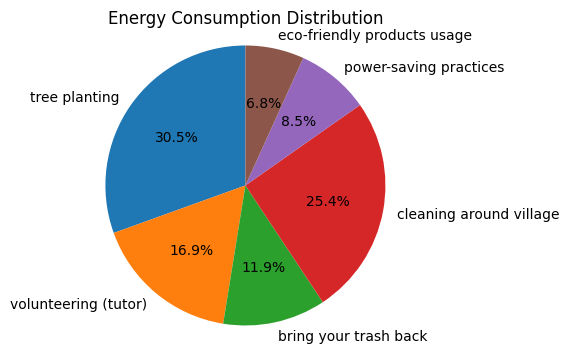

In [ ]:
# Visualizing with Line Plot Based on Energy Consumption
quest_carbon = dataset['quest_carbon']
energy_consumption = dataset['energy_consumption']
carbon_footprint = dataset['carbon_footprint']

# Create figure and axes with specific figsize
fig, ax = plt.subplots(figsize=(6, 4))

# Calculate total energy consumption and carbon footprint
total_energy_consumption = sum(energy_consumption)
total_carbon_footprint = sum(carbon_footprint)

# Plot energy consumption as a pie chart
ax.pie(energy_consumption, labels=quest_carbon, autopct='%1.1f%%', startangle=90)
# Set aspect ratio to equal to make the pie circular
ax.axis('equal')
# Set title
ax.set_title('Energy Consumption Distribution')

# Show the plot
plt.show()

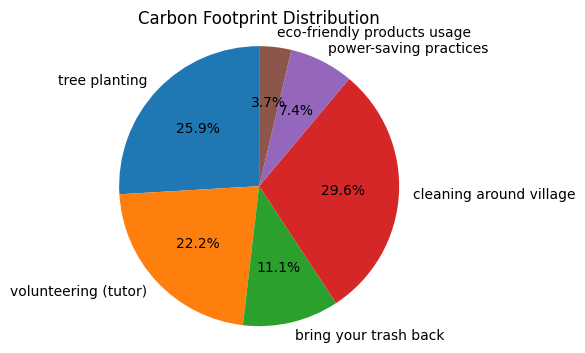

In [ ]:
# Visualizing with Line Plot Based on Carbon Footprint
quest_carbon = dataset['quest_carbon']
energy_consumption = dataset['energy_consumption']
carbon_footprint = dataset['carbon_footprint']

# Create figure and axes with specific figsize
fig, ax = plt.subplots(figsize=(6, 4))

# Calculate total energy consumption and carbon footprint
total_energy_consumption = sum(energy_consumption)
total_carbon_footprint = sum(carbon_footprint)

# Plot carbon footprint as a pie chart
ax.pie(carbon_footprint, labels=quest_carbon, autopct='%1.1f%%', startangle=90)
# Set aspect ratio to equal to make the pie circular
ax.axis('equal')
# Set title
ax.set_title('Carbon Footprint Distribution')

# Show the plot
plt.show()

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = dataset[["energy_consumption"]]  # Use double bracket to select column as DataFrame
y = dataset["carbon_footprint"]

**Step 3: Create and train the regression model**

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X, y)

LinearRegression()

In [ ]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

**Step 4: Evaluate the model**

In [ ]:
# Evaluate the model
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 4.741787004619627
Mean Absolute Error (MAE): 1.9882943143812697


**Step 5: Use the trained model for prediction**

In [ ]:
# Use the model to make predictions on new data
new_data = np.array([[18]])  # Example of new data with energy consumption value of 18
predicted_carbon_footprint = model.predict(new_data)
print("Predicted Carbon Footprint:", predicted_carbon_footprint)

Predicted Carbon Footprint: [9.87625418]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Using input function
def predict_carbon_footprint():
    energy_consumption = float(input("Enter the energy consumption: "))
    new_data = np.array([[energy_consumption]])
    predicted_carbon_footprint = model.predict(new_data)
    print("Predicted Carbon Footprint:", predicted_carbon_footprint)

# Memanggil fungsi untuk memprediksi nilai carbon_footprint
predict_carbon_footprint()


Enter the energy consumption: 17
Predicted Carbon Footprint: [9.2541806]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Setting up the 7th data (for example in the form DataFrame)
data_7_carbon = pd.DataFrame({'energy_consumption': [17]})

# Make predictions on the 7th data
predicted_carbon_footprint = model.predict(data_7_carbon)

# Display prediction results
print("Predicted Carbon Footprint:", predicted_carbon_footprint)

Predicted Carbon Footprint: [9.2541806]


# Classification Algorithm: Make **environmental_impact** category

In [ ]:
# Splitting the data into features and target variable
X2 = dataset[['number_of_participants', 'activity_duration']]
y2 = dataset['environmental_impact']

# Splitting the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the classifier on the training data
model.fit(X2_train, y2_train)

# Make predictions on the testing data
predictions = model.predict(X2_test)

# Menghitung akurasi model
accuracy = accuracy_score(y2_test, predictions)
print("Akurasi: ", accuracy)

Akurasi:  1.0


In [ ]:
# Setting up the 7th data (for example in the form DataFrame)
data_7 = pd.DataFrame({'number_of_participants': [2], 'activity_duration': [30]})

# # Make predictions on the 7th data
prediction_7 = model.predict(data_7)

# Displays prediction results
print(prediction_7)


['Low']


In [ ]:
# Make category mapping of the number_of_participants
mapping_number_of_participants = {
    (0, 4): "Few",
    (5, 10): "Moderate",
    (11, float("inf")): "Many"
}

# Make category mapping of activity_duration
mapping_activity_duration = {
    (0, 60): "Short",
    (60, 180): "Average",
    (180, float("inf")): "Long"
}

# Use mapping to change values in columns
dataset["number_of_participants"] = pd.cut(dataset["number_of_participants"], bins=[0, 4, 10, float("inf")], labels=["Few", "Moderate", "Many"])
dataset["activity_duration"] = pd.cut(dataset["activity_duration"], bins=[0, 60, 180, float("inf")], labels=["Short", "Average", "Long"])

# Displays datasets that have been changed
print(dataset)

                  quest_carbon  energy_consumption  carbon_footprint  \
0                tree planting                  18                 7   
1         volunteering (tutor)                  10                 6   
2        bring your trash back                   7                 3   
3      cleaning around village                  15                 8   
4       power-saving practices                   5                 2   
5  eco-friendly products usage                   4                 1   

  number_of_participants activity_duration environmental_impact  
0                    Few           Average                 High  
1                    Few           Average               Medium  
2                    Few             Short               Medium  
3                    Few             Short                 High  
4                    Few             Short                  Low  
5                    Few             Short                  Low  


Mapping each activity to calculate quest points

In [ ]:
# Create a point mapping for each activity in the quest_carbon column
mapping_points_quest_carbon = {
    "tree planting": 5,
    "volunteering (tutor)": 3,
    "bring your trash back": 3,
    "cleaning around village": 5,
    "power-saving practices": 2,
    "eco-friendly products usage": 2,
}

# Make mapping points for each range of energy_consumption values
mapping_points_energy_consumption = {
    (0, 5): 5,
    (6, 10): 3,
    (11, float("inf")): 1
}

# Make mapping points for each range of carbon_footprint values
mapping_points_carbon_footprint = {
    (0, 3): 1,
    (4, 7): 3,
    (8, float("inf")): 5
}

# Make mapping points based on the category of the number_of_participants
mapping_points_number_of_participants = {
    "Few": 5,
    "Moderate": 10,
    "Many": 15
}

# Make points mapping based on activity_duration categories
mapping_points_activity_duration = {
    "Short": 3,
    "Average": 5,
    "Long": 8
}

# Make point mapping based on environmental_impact categories
mapping_points_environmental_impact = {
    "Low": 3,
    "Medium": 5,
    "High": 8
}

In [ ]:
# Calculates points for each column
dataset['point_quest_carbon'] = dataset['quest_carbon'].map(mapping_points_quest_carbon).astype(int)
dataset['point_energy_consumption'] = pd.cut(dataset['energy_consumption'], bins=[x[0] for x in mapping_points_energy_consumption.keys()]+[float("inf")], labels=[x for x in mapping_points_energy_consumption.values()], include_lowest=True, right=False).astype(int)
dataset['point_carbon_footprint'] = pd.cut(dataset['carbon_footprint'], bins=[x[0] for x in mapping_points_carbon_footprint.keys()]+[float("inf")], labels=[x for x in mapping_points_carbon_footprint.values()], include_lowest=True, right=False).astype(int)
dataset['point_number_of_participants'] = dataset['number_of_participants'].map(mapping_points_number_of_participants).astype(int)
dataset['point_activity_duration'] = dataset['activity_duration'].map(mapping_points_activity_duration).astype(int)
dataset['point_environmental_impact'] = dataset['environmental_impact'].map(mapping_points_environmental_impact).astype(int)

# Calculates the total points
dataset['total_points'] = (
    dataset['point_quest_carbon'] +
    dataset['point_energy_consumption'] +
    dataset['point_carbon_footprint'] +
    dataset['point_number_of_participants'] +
    dataset['point_activity_duration'] +
    dataset['point_environmental_impact']
)

# Displays dataset with column total_points
print(dataset)

                  quest_carbon  energy_consumption  carbon_footprint  \
0                tree planting                  18                 7   
1         volunteering (tutor)                  10                 6   
2        bring your trash back                   7                 3   
3      cleaning around village                  15                 8   
4       power-saving practices                   5                 2   
5  eco-friendly products usage                   4                 1   

  number_of_participants activity_duration environmental_impact  \
0                    Few           Average                 High   
1                    Few           Average               Medium   
2                    Few             Short               Medium   
3                    Few             Short                 High   
4                    Few             Short                  Low   
5                    Few             Short                  Low   

   point_quest_carbon  po